In [ ]:
def div_date(data):
    data = str(data)
    if data[-2:] == '24' :
        return data[:8]+'00'
    else:
        return data
    
df_raw_dust['측정일시'].apply(div_date)

In [20]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import re 
import datetime as dt

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 예측
# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# Support Vector Machine (예측)
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#평가함수 (분류)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#로지스틱 회귀분석
from statsmodels.api import Logit
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Support Vector Machine (분류)
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
#모델 평가
from sklearn.metrics import f1_score, roc_curve, auc

#주성분 분석
from sklearn.decomposition import PCA


#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [21]:
df_raw_air17s = pd.read_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/SURFACE_air_pollution_2017.csv", encoding="CP949")
df_raw_air18s = pd.read_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/SURFACE_air_pollution_2018.csv", encoding="CP949")
df_raw_air17ns = pd.read_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/SURFACE_air_pollution_2017_notseoul.csv", encoding="CP949")
df_raw_air18ns = pd.read_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/SURFACE_air_pollution_2018_notseoul.csv", encoding="CP949")

df_raw_air = pd.concat([df_raw_air17s,
                       df_raw_air18s,
                       df_raw_air17ns,
                       df_raw_air18ns], ignore_index=True, sort=False)

In [22]:
df_raw_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663602 entries, 0 to 1663601
Data columns (total 27 columns):
지점               1663602 non-null int64
일시               1663602 non-null object
기온(°C)           1659821 non-null float64
강수량(mm)          145722 non-null float64
풍속(m/s)          1661983 non-null float64
풍향(16방위)         1661754 non-null float64
습도(%)            1658125 non-null float64
증기압(hPa)         1658815 non-null float64
이슬점온도(°C)        1658840 non-null float64
현지기압(hPa)        1662708 non-null float64
해면기압(hPa)        1659761 non-null float64
일조(hr)           908821 non-null float64
일사(MJ/m2)        403033 non-null float64
적설(cm)           26870 non-null float64
3시간신적설(cm)       1765 non-null float64
전운량(10분위)        579263 non-null float64
중하층운량(10분위)      634007 non-null float64
운형(운형약어)         219623 non-null object
최저운고(100m )      330142 non-null float64
시정(10m)          1624555 non-null float64
지면상태(지면상태코드)     0 non-null float64
현상번호(국내식)        119911 non

In [29]:
df_raw_air = pd.read_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/SURFACE_AIR_TOTAL.csv")

In [30]:
df_raw_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 26 columns):
Unnamed: 0       96 non-null int64
지점               96 non-null int64
기온(°C)           95 non-null float64
강수량(mm)          96 non-null float64
풍속(m/s)          95 non-null float64
풍향(16방위)         95 non-null float64
습도(%)            95 non-null float64
증기압(hPa)         95 non-null float64
이슬점온도(°C)        95 non-null float64
현지기압(hPa)        95 non-null float64
해면기압(hPa)        95 non-null float64
일조(hr)           95 non-null float64
일사(MJ/m2)        43 non-null float64
적설(cm)           82 non-null float64
3시간신적설(cm)       24 non-null float64
전운량(10분위)        93 non-null float64
중하층운량(10분위)      93 non-null float64
최저운고(100m )      93 non-null float64
시정(10m)          95 non-null float64
지면상태(지면상태코드)     0 non-null float64
현상번호(국내식)        24 non-null float64
지면온도(°C)         95 non-null float64
5cm 지중온도(°C)     28 non-null float64
10cm 지중온도(°C)    28 non-null float64
20cm 지중온도(°C) 

In [23]:
df_raw_air["date"] = df_raw_air["일시"].apply(lambda x : x.split()[0])

In [33]:
df_sum = df_raw_air.groupby(['지점']).agg('mean')
df_sum['강수량(mm)'] = df_raw_air.groupby(['지점'])['강수량(mm)'].agg('sum')
df_sum = df_sum.reset_index()

In [34]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 26 columns):
지점               96 non-null int64
Unnamed: 0       96 non-null int64
기온(°C)           95 non-null float64
강수량(mm)          96 non-null float64
풍속(m/s)          95 non-null float64
풍향(16방위)         95 non-null float64
습도(%)            95 non-null float64
증기압(hPa)         95 non-null float64
이슬점온도(°C)        95 non-null float64
현지기압(hPa)        95 non-null float64
해면기압(hPa)        95 non-null float64
일조(hr)           95 non-null float64
일사(MJ/m2)        43 non-null float64
적설(cm)           82 non-null float64
3시간신적설(cm)       24 non-null float64
전운량(10분위)        93 non-null float64
중하층운량(10분위)      93 non-null float64
최저운고(100m )      93 non-null float64
시정(10m)          95 non-null float64
지면상태(지면상태코드)     0 non-null float64
현상번호(국내식)        24 non-null float64
지면온도(°C)         95 non-null float64
5cm 지중온도(°C)     28 non-null float64
10cm 지중온도(°C)    28 non-null float64
20cm 지중온도(°C) 

In [26]:
df_sum.to_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/SURFACE_AIR_TOTAL.csv",encoding = "CP949")

In [13]:
df_raw_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663602 entries, 0 to 1663601
Data columns (total 27 columns):
지점               1663602 non-null int64
일시               1663602 non-null datetime64[ns]
기온(°C)           1659821 non-null float64
강수량(mm)          145722 non-null float64
풍속(m/s)          1661983 non-null float64
풍향(16방위)         1661754 non-null float64
습도(%)            1658125 non-null float64
증기압(hPa)         1658815 non-null float64
이슬점온도(°C)        1658840 non-null float64
현지기압(hPa)        1662708 non-null float64
해면기압(hPa)        1659761 non-null float64
일조(hr)           908821 non-null float64
일사(MJ/m2)        403033 non-null float64
적설(cm)           26870 non-null float64
3시간신적설(cm)       1765 non-null float64
전운량(10분위)        579263 non-null float64
중하층운량(10분위)      634007 non-null float64
운형(운형약어)         219623 non-null object
최저운고(100m )      330142 non-null float64
시정(10m)          1624555 non-null float64
지면상태(지면상태코드)     0 non-null float64
현상번호(국내식)        11

In [24]:
df_raw_air_p = df_raw_air[df_raw_air['지점'] == 108] or df_raw_air[df_raw_air['지점'] == 112]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
df_raw_air_p

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,2017-01-01 00:00:00,0.2,NaN,2.2,20.0,79.0,4.9,-3.0,1018.8,...,Sc,8.0,491.0,NaN,40.0,-0.9,0.1,0.3,1.7,2.6
1,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,NaN,7.0,549.0,NaN,40.0,-0.9,0.0,0.3,1.7,2.6
2,108,2017-01-01 02:00:00,-0.3,NaN,1.9,50.0,81.0,4.9,-3.1,1018.5,...,NaN,8.0,483.0,NaN,4019.0,-1.8,0.0,0.3,1.7,2.6
3,108,2017-01-01 03:00:00,-0.7,NaN,2.0,50.0,84.0,4.9,-3.0,1018.8,...,NaN,NaN,436.0,NaN,19.0,-2.1,0.0,0.3,1.7,2.7
4,108,2017-01-01 04:00:00,-1.1,NaN,1.6,20.0,85.0,4.8,-3.3,1018.6,...,NaN,NaN,430.0,NaN,19.0,-2.4,-0.1,0.4,1.7,2.6
5,108,2017-01-01 05:00:00,-1.4,NaN,1.4,50.0,86.0,4.8,-3.4,1018.3,...,NaN,NaN,381.0,NaN,19.0,-2.6,-0.2,0.4,1.7,2.6
6,108,2017-01-01 06:00:00,-1.5,NaN,1.6,20.0,87.0,4.8,-3.3,1018.1,...,Sc,7.0,365.0,NaN,19.0,-2.7,-0.2,0.4,1.7,2.6
7,108,2017-01-01 07:00:00,-1.5,NaN,1.4,20.0,87.0,4.8,-3.3,1018.6,...,Sc,7.0,368.0,NaN,19.0,-2.2,-0.3,0.4,1.7,2.6
8,108,2017-01-01 08:00:00,-1.3,NaN,1.4,20.0,87.0,4.9,-3.1,1019.0,...,Sc,10.0,355.0,NaN,19.0,-1.8,-0.1,0.4,1.7,2.6
9,108,2017-01-01 09:00:00,-0.4,NaN,1.6,20.0,83.0,4.9,-2.9,1019.4,...,Sc,10.0,384.0,NaN,19.0,-0.2,0.0,0.4,1.7,2.6


In [104]:
df_raw_dust.shape

(3073214, 12)

In [9]:
df_raw_dust['측정일시'] = df_raw_dust['측정일시'].astype("str")

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H')

    date_str = date_str[0:8] + '00'
    return pd.to_datetime(date_str, format='%Y%m%d%H') + \
           dt.timedelta(days=1)

df_raw_dust['측정일시'] = df_raw_dust['측정일시'].apply(my_to_datetime)

In [10]:
df_raw_air = df_raw_air.rename(columns = {'일시': '측정일시'})

In [6]:
df_raw_air.shape

(17520, 27)

In [7]:
df_raw_dust.shape

(3073214, 12)

In [5]:
df_raw_air

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,2017-01-01 00:00:00,0.2,NaN,2.2,20.0,79.0,4.9,-3.0,1018.8,...,Sc,8.0,491,NaN,40.0,-0.9,0.1,0.3,1.7,2.6
1,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,NaN,7.0,549,NaN,40.0,-0.9,0.0,0.3,1.7,2.6
2,108,2017-01-01 02:00:00,-0.3,NaN,1.9,50.0,81.0,4.9,-3.1,1018.5,...,NaN,8.0,483,NaN,4019.0,-1.8,0.0,0.3,1.7,2.6
3,108,2017-01-01 03:00:00,-0.7,NaN,2.0,50.0,84.0,4.9,-3.0,1018.8,...,NaN,NaN,436,NaN,19.0,-2.1,0.0,0.3,1.7,2.7
4,108,2017-01-01 04:00:00,-1.1,NaN,1.6,20.0,85.0,4.8,-3.3,1018.6,...,NaN,NaN,430,NaN,19.0,-2.4,-0.1,0.4,1.7,2.6
5,108,2017-01-01 05:00:00,-1.4,NaN,1.4,50.0,86.0,4.8,-3.4,1018.3,...,NaN,NaN,381,NaN,19.0,-2.6,-0.2,0.4,1.7,2.6
6,108,2017-01-01 06:00:00,-1.5,NaN,1.6,20.0,87.0,4.8,-3.3,1018.1,...,Sc,7.0,365,NaN,19.0,-2.7,-0.2,0.4,1.7,2.6
7,108,2017-01-01 07:00:00,-1.5,NaN,1.4,20.0,87.0,4.8,-3.3,1018.6,...,Sc,7.0,368,NaN,19.0,-2.2,-0.3,0.4,1.7,2.6
8,108,2017-01-01 08:00:00,-1.3,NaN,1.4,20.0,87.0,4.9,-3.1,1019.0,...,Sc,10.0,355,NaN,19.0,-1.8,-0.1,0.4,1.7,2.6
9,108,2017-01-01 09:00:00,-0.4,NaN,1.6,20.0,83.0,4.9,-2.9,1019.4,...,Sc,10.0,384,NaN,19.0,-0.2,0.0,0.4,1.7,2.6


In [8]:
df_raw_dust

,지역,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,서울 중구,111121,중구,2017010101,0.0060,1.3,0.002,0.0680,77.0,63.0,서울 중구 덕수궁길 15,NaN
1,서울 중구,111121,중구,2017010102,0.0060,1.4,0.002,0.0660,76.0,63.0,서울 중구 덕수궁길 15,NaN
2,서울 중구,111121,중구,2017010103,0.0050,1.2,0.002,0.0630,73.0,57.0,서울 중구 덕수궁길 15,NaN
3,서울 중구,111121,중구,2017010104,0.0050,1.1,0.002,0.0530,67.0,55.0,서울 중구 덕수궁길 15,NaN
4,서울 중구,111121,중구,2017010105,0.0040,1.1,0.002,0.0510,66.0,54.0,서울 중구 덕수궁길 15,NaN
5,서울 중구,111121,중구,2017010106,0.0040,1.1,0.002,0.0500,66.0,55.0,서울 중구 덕수궁길 15,NaN
6,서울 중구,111121,중구,2017010107,0.0050,1.1,0.002,0.0500,70.0,56.0,서울 중구 덕수궁길 15,NaN
7,서울 중구,111121,중구,2017010108,0.0040,1.0,0.002,0.0500,69.0,58.0,서울 중구 덕수궁길 15,NaN
8,서울 중구,111121,중구,2017010109,0.0050,0.9,0.002,0.0460,70.0,55.0,서울 중구 덕수궁길 15,NaN
9,서울 중구,111121,중구,2017010110,0.0050,0.9,0.002,0.0460,73.0,55.0,서울 중구 덕수궁길 15,NaN


In [60]:
df_raw = pd.merge(df_raw_air, df_raw_dust, on='측정일시')

In [61]:
df_raw

,지점,측정일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),...,측정소코드,측정소명,SO2,CO,O3,NO2,PM10,PM25,주소,망
0,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111121,중구,0.0060,1.3,0.002,0.0680,77.0,63.0,서울 중구 덕수궁길 15,NaN
1,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111122,한강대로,0.0060,1.2,0.002,0.0670,82.0,NaN,서울 용산구 한강대로 405,NaN
2,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111123,종로구,0.0040,1.2,0.002,0.0590,73.0,57.0,서울 종로구 종로35가길 19,NaN
3,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111124,청계천로,0.0060,1.3,0.002,0.0590,63.0,NaN,서울 중구 청계천로 184,NaN
4,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111125,종로,0.0040,0.9,0.002,0.0540,71.0,NaN,서울 종로구 종로 169,NaN
5,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111131,용산구,0.0050,1.4,0.002,0.0390,70.0,68.0,서울 용산구 한남대로 136,NaN
6,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111141,광진구,0.0040,0.8,0.003,0.0450,68.0,63.0,서울 광진구 광나루로 571,NaN
7,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111142,성동구,0.0050,0.9,0.002,0.0490,64.0,40.0,서울 성동구 뚝섬로 273,NaN
8,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111143,강변북로,0.0040,0.9,0.003,0.0410,65.0,NaN,서울 성동구 강변북로 257,NaN
9,108,2017-01-01 01:00:00,0.0,NaN,1.4,20.0,78.0,4.8,-3.3,1018.9,...,111151,중랑구,0.0050,0.8,0.002,0.0400,91.0,50.0,서울 중랑구 용마산로 369,NaN


In [66]:
df_raw.shape

(3072818, 38)

In [ ]:
df_raw_dust["date"] = df_raw_dust["측정일시"].apply(lambda x : x.split()[0])
df_raw_dust["year"] = df_raw_dust["date"].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").year)
df_raw_dust["month"] = df_raw_dust["date"].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)
df_raw_dust["day"] = df_raw_dust["date"].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").day)
df_raw_dust["weekday"] = df_raw_dust.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_raw_dust["hour"] = df_raw_dust["측정일시"].apply(lambda x : x.split()[1].split(":")[0])

In [ ]:
df_raw_air["date"] = df_raw_air["측정일시"].apply(lambda x : x.split()[0])
df_raw_air["year"] = df_raw_air["date"].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").year)
df_raw_air["month"] = df_raw_air["date"].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").month)
df_raw_air["day"] = df_raw_air["date"].apply(lambda dateString : datetime.strptime(dateString, "%Y-%m-%d").day)
df_raw_air["weekday"] = df_raw_air.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_raw_air["hour"] = df_raw_air["측정일시"].apply(lambda x : x.split()[1].split(":")[0])

In [ ]:
df_raw_air["date"] = df_raw_air["측정일시"].apply(lambda x : x.split()[0])

In [ ]:
df_raw

In [70]:
df_raw_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 27 columns):
지점               17520 non-null int64
측정일시             17520 non-null datetime64[ns]
기온(°C)           17515 non-null float64
강수량(mm)          1723 non-null float64
풍속(m/s)          17474 non-null float64
풍향(16방위)         17474 non-null float64
습도(%)            17499 non-null float64
증기압(hPa)         17508 non-null float64
이슬점온도(°C)        17508 non-null float64
현지기압(hPa)        17515 non-null float64
해면기압(hPa)        17516 non-null float64
일조(hr)           9529 non-null float64
일사(MJ/m2)        9528 non-null float64
적설(cm)           708 non-null float64
3시간신적설(cm)       54 non-null float64
전운량(10분위)        14483 non-null float64
중하층운량(10분위)      17309 non-null float64
운형(운형약어)         9590 non-null object
최저운고(100m )      8754 non-null float64
시정(10m)          17520 non-null int64
지면상태(지면상태코드)     0 non-null float64
현상번호(국내식)        6210 non-null float64
지면온도(°C)         17504 n

In [72]:
df_raw_air.describe()

,지점,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,17520.0,17515.000000,1723.000000,17474.000000,17474.000000,17499.000000,17508.000000,17508.000000,17515.000000,17516.000000,...,17309.000000,8754.000000,17520.000000,0.0,6.210000e+03,17504.000000,17504.000000,17506.000000,17504.000000,17504.000000
mean,108.0,13.029529,1.460998,1.971895,198.414788,57.620721,11.111995,4.029050,1006.400953,1016.679647,...,3.009302,14.994745,1432.772546,NaN,3.597601e+05,14.731370,14.383827,14.427139,14.348223,14.460895
std,0.0,11.631192,3.795361,1.156725,111.105610,20.102989,8.436779,12.898373,7.951490,8.397091,...,3.589906,13.030024,603.421317,NaN,2.434503e+07,14.178665,11.404147,10.720439,9.960681,9.632776
min,108.0,-17.800000,0.000000,0.000000,0.000000,7.000000,0.500000,-31.100000,980.800000,990.300000,...,0.000000,1.000000,14.000000,NaN,1.000000e+00,-13.600000,-9.300000,-6.400000,-3.000000,-1.200000
25%,108.0,3.350000,0.000000,1.100000,70.000000,42.000000,4.100000,-5.500000,1000.100000,1009.900000,...,0.000000,8.000000,927.000000,NaN,1.900000e+01,1.800000,2.700000,3.900000,4.500000,4.800000
50%,108.0,14.300000,0.100000,1.800000,250.000000,57.000000,8.800000,5.100000,1006.400000,1016.700000,...,1.000000,10.000000,1670.000000,NaN,4.000000e+01,14.200000,15.100000,15.300000,15.300000,15.400000
75%,108.0,22.800000,1.000000,2.700000,290.000000,73.000000,16.800000,14.800000,1012.600000,1023.300000,...,7.000000,16.000000,2000.000000,NaN,4.200000e+01,24.600000,24.100000,24.100000,23.600000,23.500000
max,108.0,39.400000,50.500000,8.000000,360.000000,100.000000,36.100000,27.200000,1028.300000,1039.600000,...,10.000000,76.000000,2000.000000,NaN,1.916040e+09,62.200000,41.700000,36.300000,32.300000,30.700000


In [75]:
df_raw_air.isnull().sum()

지점                   0
측정일시                 0
기온(°C)               5
강수량(mm)          15797
풍속(m/s)             46
풍향(16방위)            46
습도(%)               21
증기압(hPa)            12
이슬점온도(°C)           12
현지기압(hPa)            5
해면기압(hPa)            4
일조(hr)            7991
일사(MJ/m2)         7992
적설(cm)           16812
3시간신적설(cm)       17466
전운량(10분위)         3037
중하층운량(10분위)        211
운형(운형약어)          7930
최저운고(100m )       8766
시정(10m)              0
지면상태(지면상태코드)     17520
현상번호(국내식)        11310
지면온도(°C)            16
5cm 지중온도(°C)        16
10cm 지중온도(°C)       14
20cm 지중온도(°C)       16
30cm 지중온도(°C)       16
dtype: int64

In [76]:
df_raw_dust.isnull().sum()

지역             0
측정소코드          0
측정소명           0
측정일시           0
SO2       149145
CO        169564
O3        189499
NO2       156169
PM10      193871
PM25      728927
주소             0
망        1890696
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275065D46A0>,
      dtype=object)

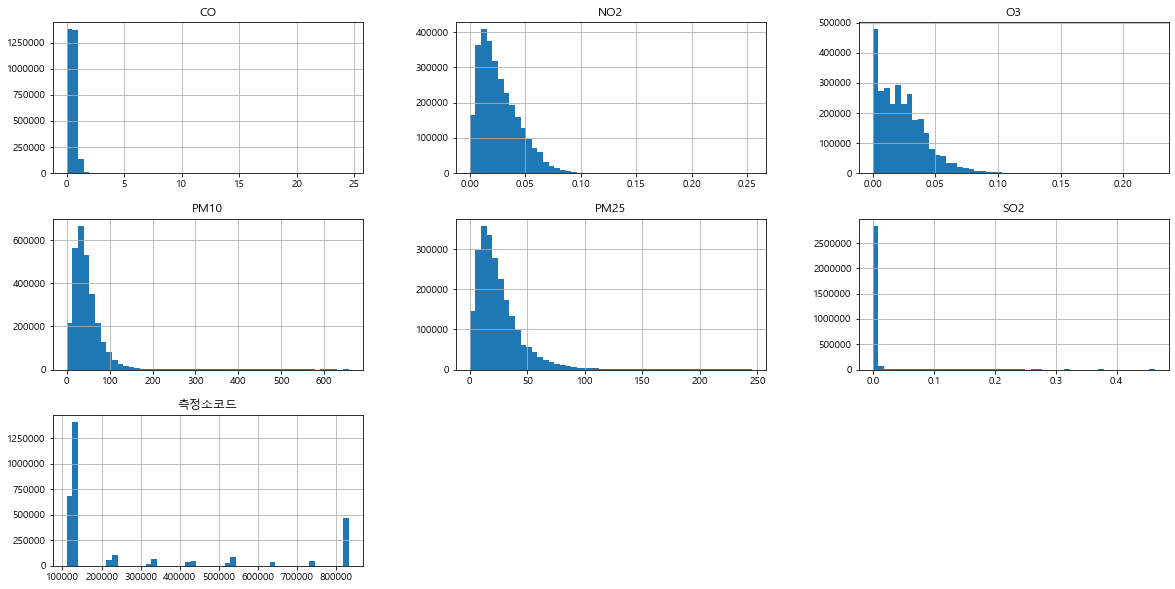

In [104]:
df_raw_dust.hist(figsize=(20, 10), bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027501735940>,
      dtype=object)

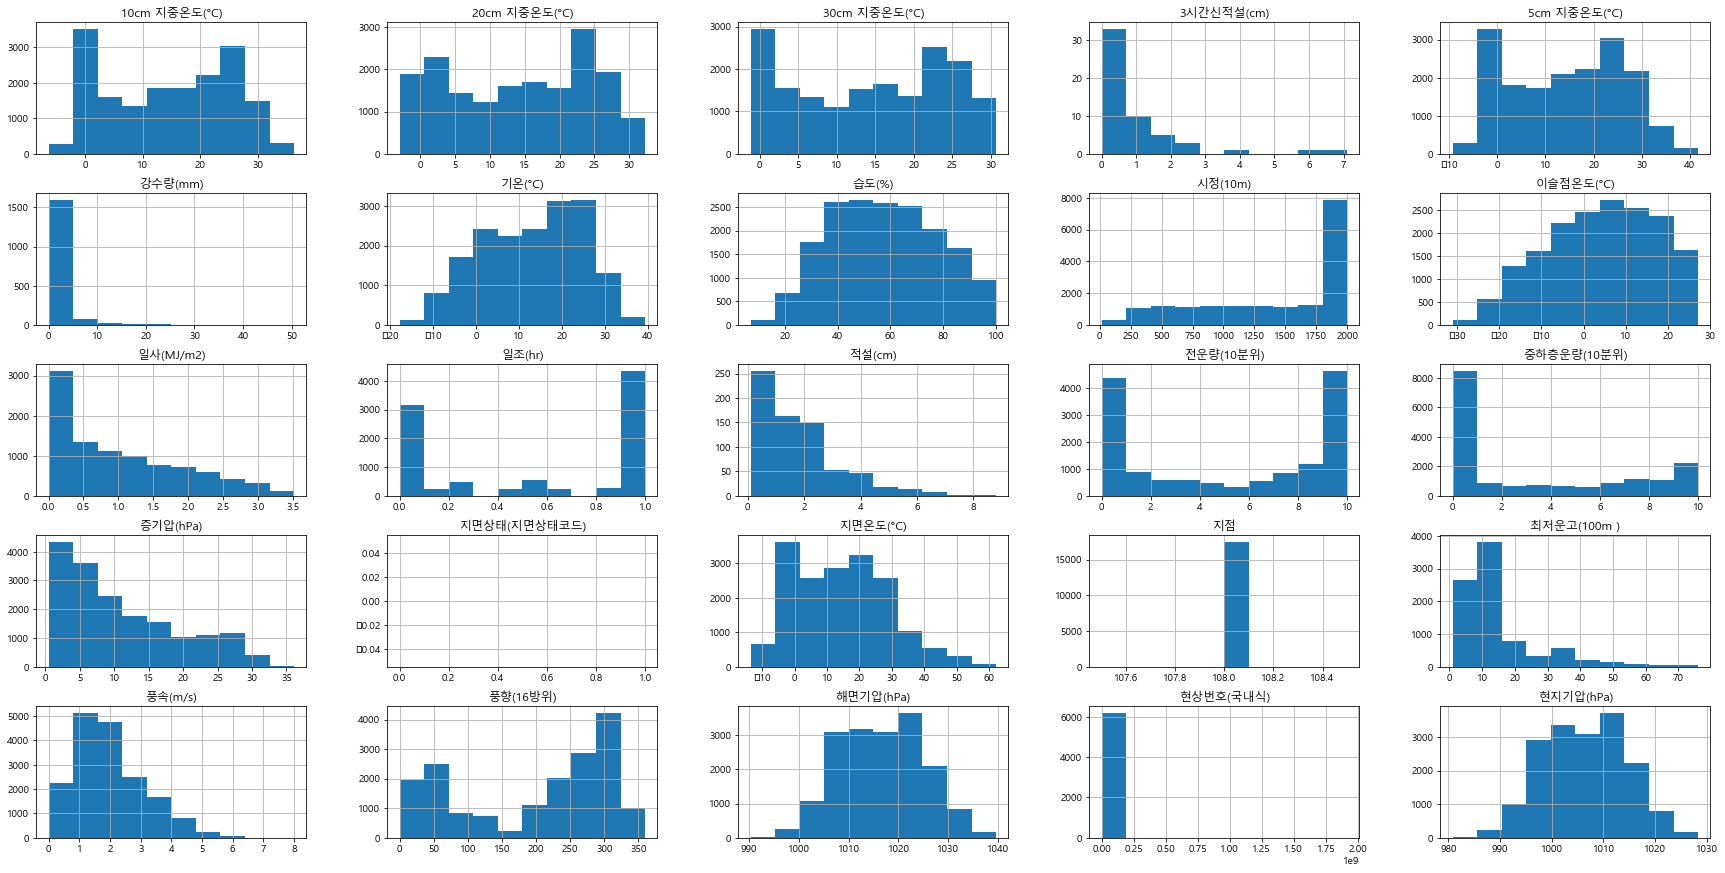

In [87]:
df_raw_air.hist(figsize=(30, 15))

In [93]:
df_raw_air['지점'].value_counts()

108    17520
Name: 지점, dtype: int64

In [94]:
df_raw_air['지점']

0        108
1        108
2        108
3        108
4        108
        ... 
17515    108
17516    108
17517    108
17518    108
17519    108
Name: 지점, Length: 17520, dtype: int64

In [97]:
df_raw_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073214 entries, 0 to 3073213
Data columns (total 12 columns):
지역       object
측정소코드    int64
측정소명     object
측정일시     datetime64[ns]
SO2      float64
CO       float64
O3       float64
NO2      float64
PM10     float64
PM25     float64
주소       object
망        object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 281.4+ MB


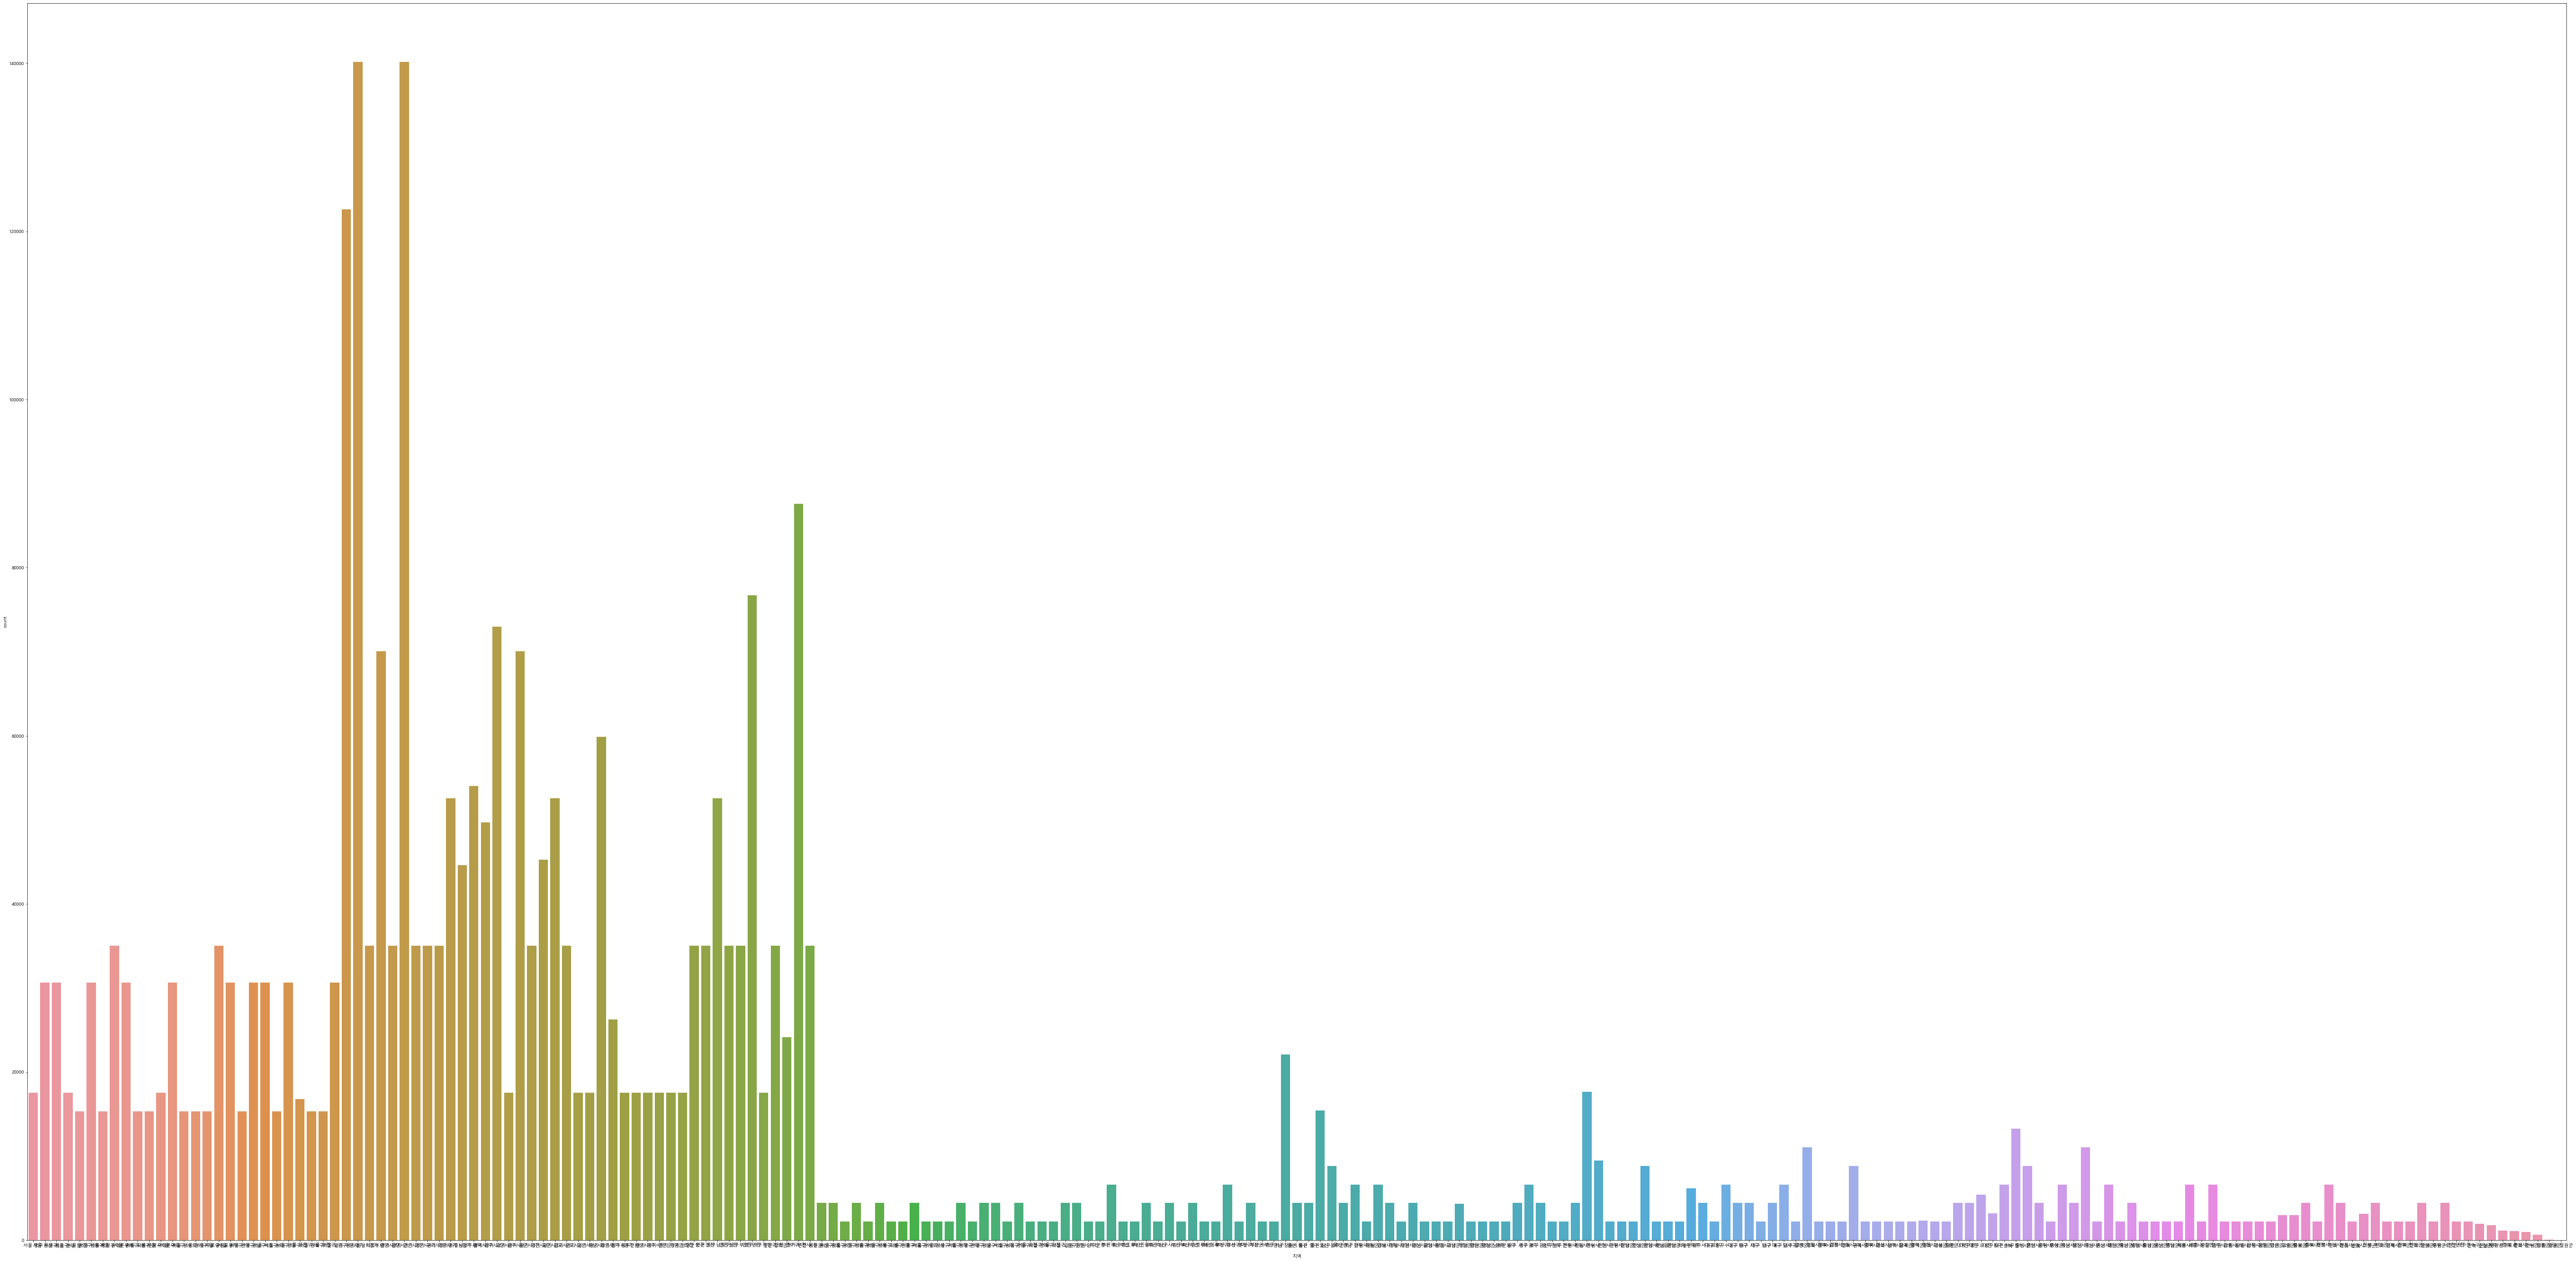

In [100]:
plt.figure(figsize = [100,50])
sns.countplot(df_raw['지역'])

In [123]:
df_raw_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073214 entries, 0 to 3073213
Data columns (total 12 columns):
지역       object
측정소코드    int64
측정소명     object
측정일시     datetime64[ns]
SO2      float64
CO       float64
O3       float64
NO2      float64
PM10     float64
PM25     float64
주소       object
망        object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 281.4+ MB


In [126]:
df_char = df_raw_dust.select_dtypes(include = "object")
df_numeric = df_raw_dust.select_dtypes(exclude = ("object" or "datetime64[ns]"))
df_numeric = df_numeric.drop("측정일시", axis=1)

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

df_scaled_dust = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled_dust.head()

,측정소코드,SO2,CO,O3,NO2,PM10,PM25,지역,측정소명,주소,망
0,-0.639913,0.603758,3.212707,-1.154467,2.346688,1.029072,2.034526,서울 중구,중구,서울 중구 덕수궁길 15,NaN
1,-0.639913,0.603758,3.620710,-1.154467,2.233141,0.996182,2.034526,서울 중구,중구,서울 중구 덕수궁길 15,NaN
2,-0.639913,0.254753,2.804704,-1.154467,2.062822,0.897513,1.716146,서울 중구,중구,서울 중구 덕수궁길 15,NaN
3,-0.639913,0.254753,2.396702,-1.154467,1.495090,0.700174,1.610019,서울 중구,중구,서울 중구 덕수궁길 15,NaN
4,-0.639913,-0.094252,2.396702,-1.154467,1.381543,0.667284,1.556956,서울 중구,중구,서울 중구 덕수궁길 15,NaN


In [140]:
df_char = df_raw_air.select_dtypes(include = "object")
df_numeric = df_raw_air.select_dtypes(exclude = ("object" or "datetime64[ns]"))
df_numeric = df_numeric.drop(["측정일시","현상번호(국내식)"], axis=1)

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

df_scaled_air = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled_air.head()

,지점,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면상태(지면상태코드),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),운형(운형약어)
0,0.0,-1.103059,NaN,0.197204,-1.605859,1.063518,-0.736320,-0.544972,1.559381,1.550623,...,1.111677,-0.536848,-1.560766,NaN,-1.102489,-1.252547,-1.317814,-1.269851,-1.231341,Sc
1,0.0,-1.120255,NaN,-0.494423,-1.605859,1.013773,-0.748174,-0.568231,1.571957,1.574442,...,0.275976,-0.613598,-1.464645,NaN,-1.102489,-1.261316,-1.317814,-1.269851,-1.231341,NaN
2,0.0,-1.146048,NaN,-0.062156,-1.335837,1.163008,-0.736320,-0.552725,1.521651,1.514896,...,-0.559725,-0.536848,-1.574024,NaN,-1.165966,-1.261316,-1.317814,-1.269851,-1.231341,NaN
3,0.0,-1.180440,NaN,0.024297,-1.335837,1.312244,-0.736320,-0.544972,1.559381,1.562532,...,-0.838292,NaN,-1.651915,NaN,-1.187125,-1.261316,-1.317814,-1.269851,-1.220960,NaN
4,0.0,-1.214831,NaN,-0.321516,-1.605859,1.361990,-0.748174,-0.568231,1.534228,1.538714,...,-0.838292,NaN,-1.661859,NaN,-1.208284,-1.270085,-1.308486,-1.269851,-1.231341,NaN


In [ ]:
v_feature_name_dust = df_raw_air.columns

scaler = StandardScaler()
df_scaled_dust = scaler.fit_transform(df_raw_dust)
df_scaled_dust = pd.DataFrame(df_scaled_dust, columns = v_feature_name_dust)
df_scaled_dust.head()

In [102]:
df_raw_dust.describe()

,측정소코드,SO2,CO,O3,NO2,PM10,PM25
count,3.073214e+06,2.924069e+06,2.903650e+06,2.883715e+06,2.917045e+06,2.879343e+06,2.344287e+06
mean,2.798702e+05,4.270061e-03,5.125767e-01,2.355637e-02,2.666557e-02,4.571151e+01,2.465852e+01
std,2.637065e+05,2.865289e-03,2.450966e-01,1.867214e-02,1.761395e-02,3.040458e+01,1.884542e+01
min,1.111210e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.311150e+05,3.000000e-03,3.000000e-01,8.000000e-03,1.300000e-02,2.500000e+01,1.100000e+01
50%,1.313810e+05,4.000000e-03,5.000000e-01,2.100000e-02,2.300000e-02,3.900000e+01,2.000000e+01
75%,3.361610e+05,5.000000e-03,6.000000e-01,3.400000e-02,3.700000e-02,5.800000e+01,3.300000e+01
max,8.314920e+05,4.620000e-01,2.450000e+01,2.250000e-01,2.540000e-01,6.570000e+02,2.450000e+02


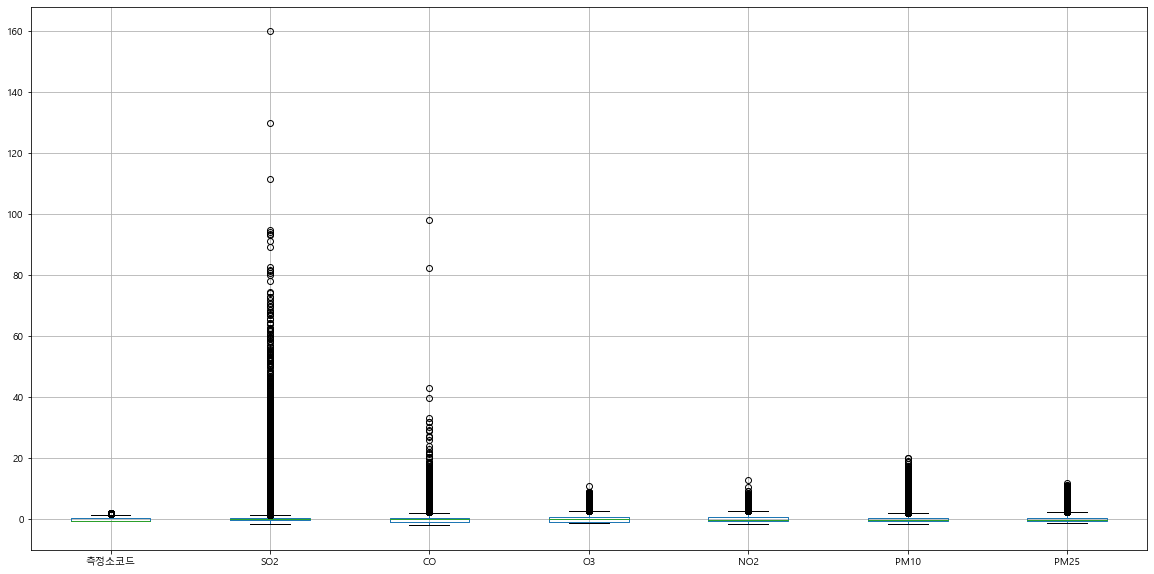

In [144]:
df_scaled_dust.boxplot(figsize=(20,10))

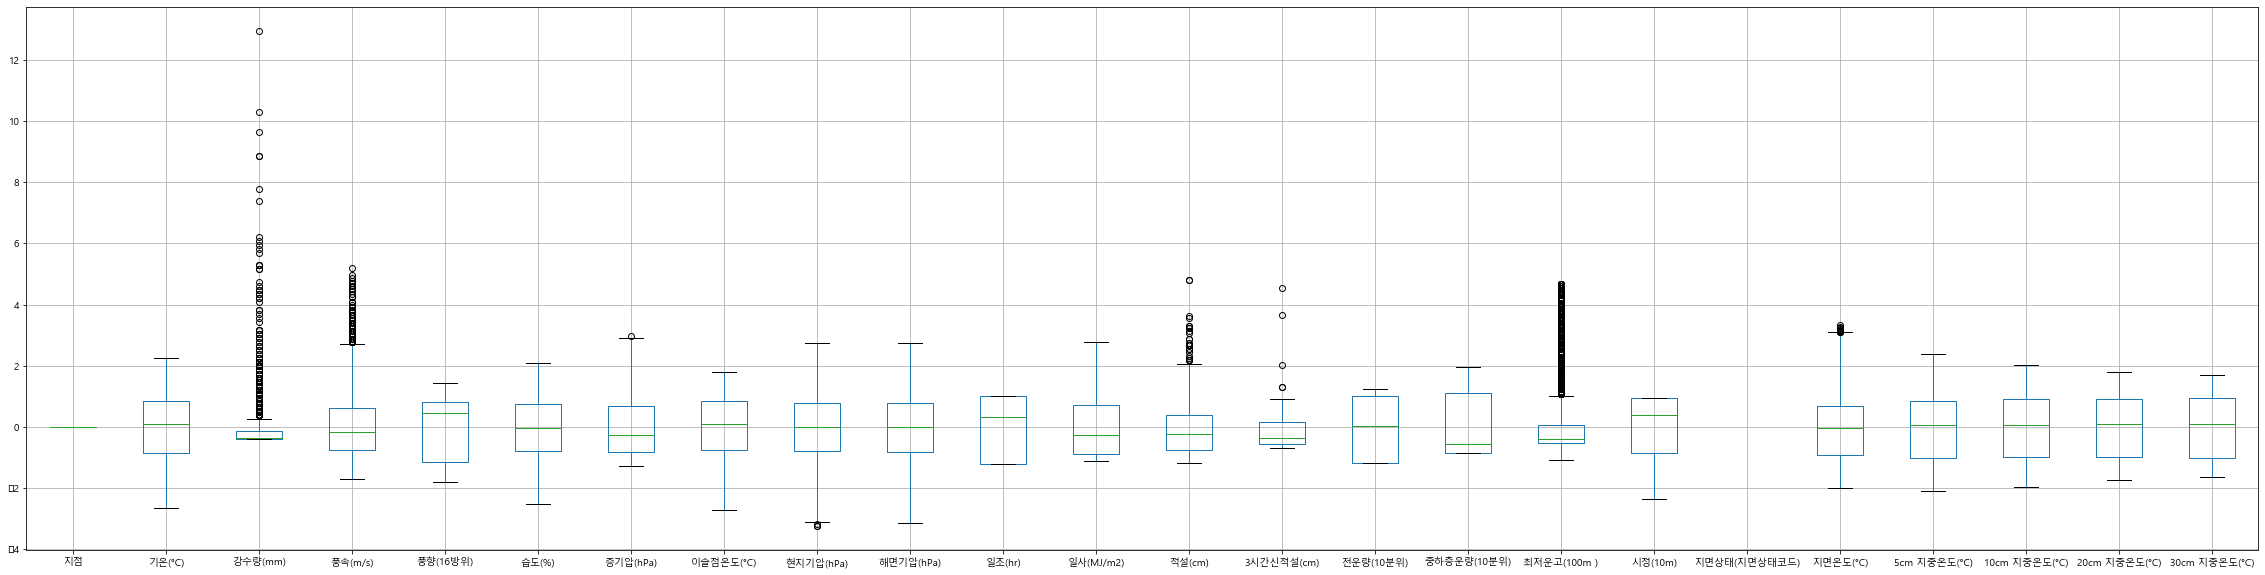

In [143]:
df_scaled_air.boxplot(figsize=(40,10))

In [12]:
df_raw_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073214 entries, 0 to 3073213
Data columns (total 12 columns):
지역       object
측정소코드    int64
측정소명     object
측정일시     datetime64[ns]
SO2      float64
CO       float64
O3       float64
NO2      float64
PM10     float64
PM25     float64
주소       object
망        object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 281.4+ MB


In [59]:
df_raw_dust = df_raw_air.copy()

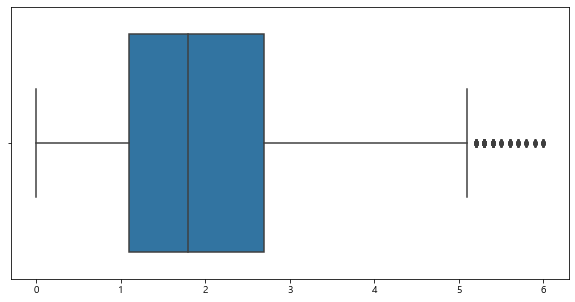

In [53]:
plt.figure(figsize = [10,5])
sns.boxplot(data=df_raw_dust, x=['풍속(m/s)'])

In [159]:
df_raw_dust['SO2'].isnull().sum()

149145

In [46]:
df_raw_dust[df_raw_dust['풍속(m/s)']>5].agg("count")

지점               218
일시               218
기온(°C)           218
강수량(mm)           27
풍속(m/s)          218
풍향(16방위)         218
습도(%)            218
증기압(hPa)         218
이슬점온도(°C)        218
현지기압(hPa)        218
해면기압(hPa)        218
일조(hr)           189
일사(MJ/m2)        190
적설(cm)             8
3시간신적설(cm)         2
전운량(10분위)        199
중하층운량(10분위)      217
운형(운형약어)         138
최저운고(100m )      114
시정(10m)          218
지면상태(지면상태코드)       0
현상번호(국내식)         64
지면온도(°C)         218
5cm 지중온도(°C)     218
10cm 지중온도(°C)    218
20cm 지중온도(°C)    218
30cm 지중온도(°C)    218
dtype: int64

In [52]:
df_raw_dust['풍속(m/s)'][df_raw_dust['풍속(m/s)']>6] = df_raw_dust['풍속(m/s)'].agg("mean")

In [91]:
df_raw_dust = df_raw_dust.sort_values(by='SO2', ascending=False)
df_raw_dust['SO2'].head(200)

1708130    0.02
1735347    0.02
2412807    0.02
1251416    0.02
1833586    0.02
           ... 
250650     0.02
193557     0.02
475232     0.02
567552     0.02
1388961    0.02
Name: SO2, Length: 200, dtype: float64

1738591    0.200
476190     0.199
1708105    0.199
1738851    0.197
474769     0.196
1735990    0.196
476910     0.192
1735800    0.192
788360     0.188
1103877    0.188
2031125    0.187
1736261    0.184
168342     0.184
1418858    0.183
476737     0.182
2062103    0.181
788524     0.181
1420451    0.178
168341     0.177
788135     0.175
1421044    0.175
788359     0.174
788525     0.174
790016     0.174
788663     0.173
1739069    0.171
476311     0.171
2994737    0.170
1420803    0.168
168458     0.166
1736403    0.166
168344     0.164
476542     0.163
1420805    0.162
168010     0.161
165990     0.161
2062349    0.161
473568     0.160
476307     0.160
789554     0.160
1735991    0.159
137468     0.159
475198     0.159
475581     0.158
789648     0.156
1737794    0.156
1420806    0.156
168343     0.155
476281     0.155
476310     0.154
Name: SO2, dtype: float64

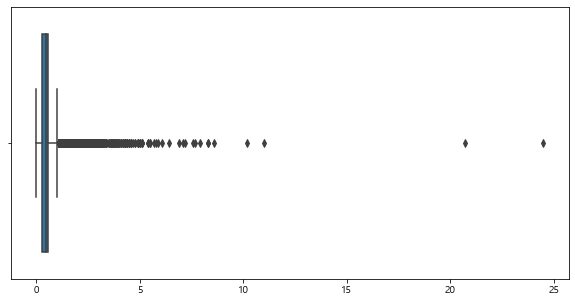

In [22]:
plt.figure(figsize = [10,5])
sns.boxplot(data=df_raw_dust, x=['CO'])

In [4]:
df_raw_dust['SO2'][df_raw_dust['SO2']>0.015] = df_raw_dust['SO2'].agg("mean")
df_raw_dust['CO'][df_raw_dust['CO']>1.5] = df_raw_dust['CO'].agg("mean")
df_raw_dust['O3'][df_raw_dust['O3']>0.09] = df_raw_dust['O3'].agg("mean")
df_raw_dust['NO2'][df_raw_dust['NO2']>0.085] = df_raw_dust['NO2'].agg("mean")
df_raw_dust['PM10'][df_raw_dust['PM10']>200] = df_raw_dust['PM10'].agg("mean")
df_raw_dust['PM25'][df_raw_dust['PM25']>150] = df_raw_dust['PM25'].agg("mean")

In [8]:
df_raw_dust = df_raw_dust.to_pickle("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/PKL/Dust.pkl")

In [9]:
df_raw_air['풍속(m/s)'][df_raw_air['풍속(m/s)']>6] = df_raw_air['풍속(m/s)'].agg("mean")
df_raw_air['증기압(hPa)'][df_raw_air['증기압(hPa)']>33] = df_raw_air['증기압(hPa)'].agg("mean")
df_raw_air['지면온도(°C)'][df_raw_air['지면온도(°C)']>57.1] = df_raw_air['지면온도(°C)'].agg("mean")

In [10]:
df_raw_air = df_raw_air.to_pickle("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/PKL/Air.pkl")

In [11]:
df_raw_pos = df_raw_pos[(df_raw_pos['Sales (Bag)'] != 0) | (df_raw_pos['금액'] == 0)]

In [12]:
df_raw_pos = df_raw_pos.to_pickle("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/PKL/POS.pkl")

In [10]:
df_raw_air_ori['기온(°C)'].isnull().sum()

0

In [15]:
df_raw_air_ori['기온(°C)'].dtype

dtype('float64')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B71BEEEBE0>,
      dtype=object)

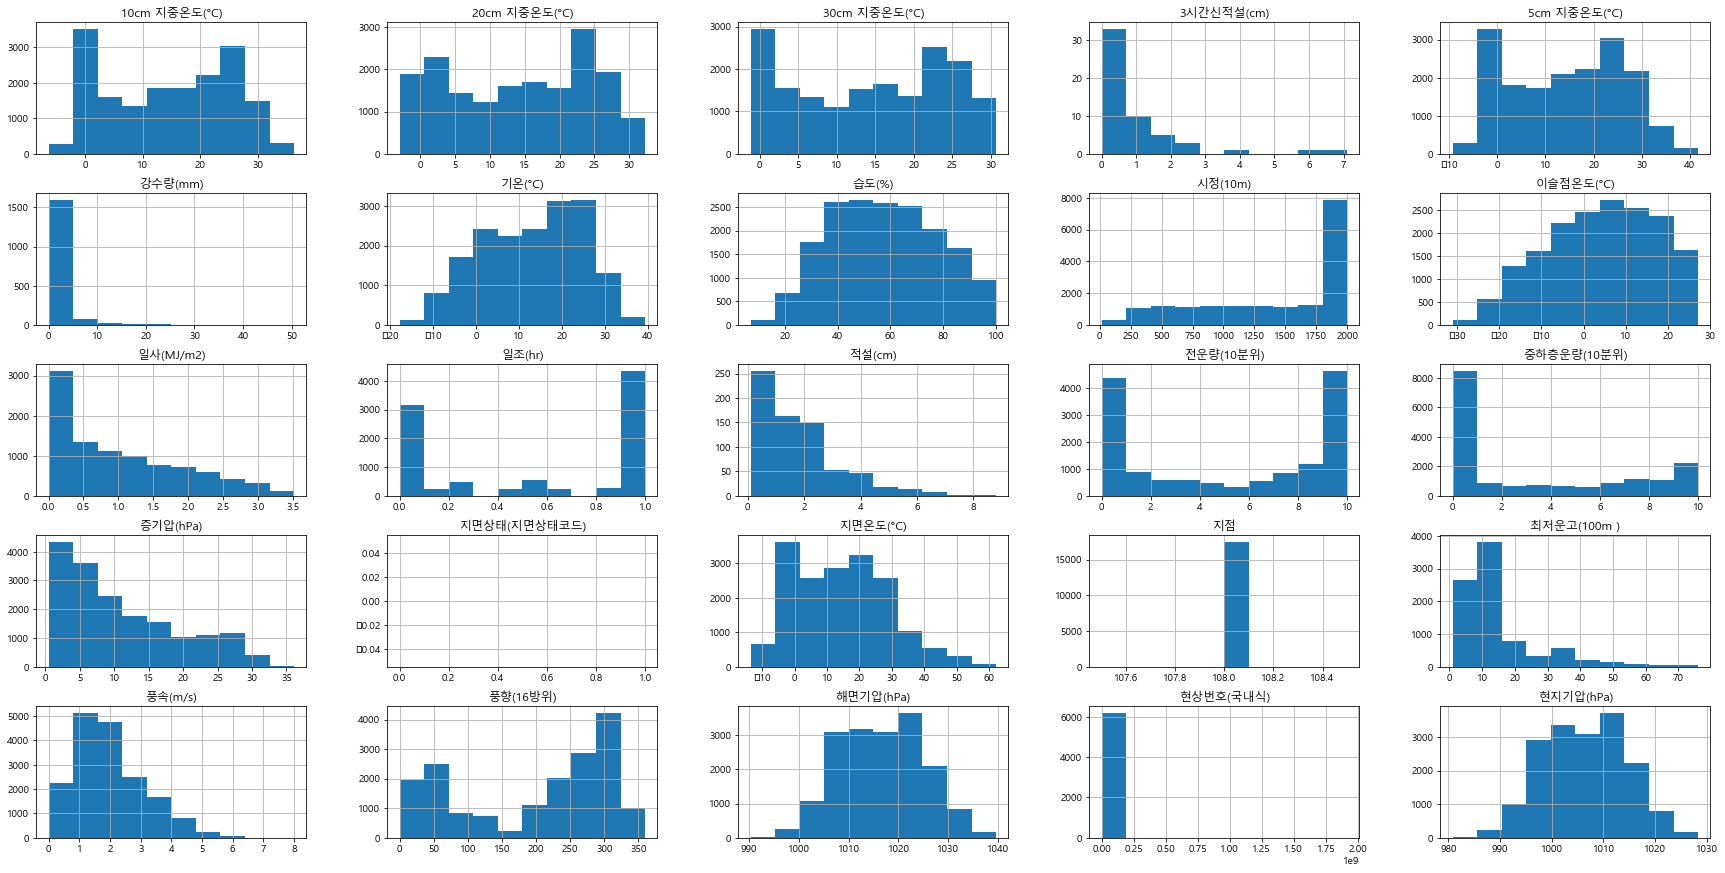

In [58]:
df_raw_air.hist(figsize=(30,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B70DBE59E8>,
      dtype=object)

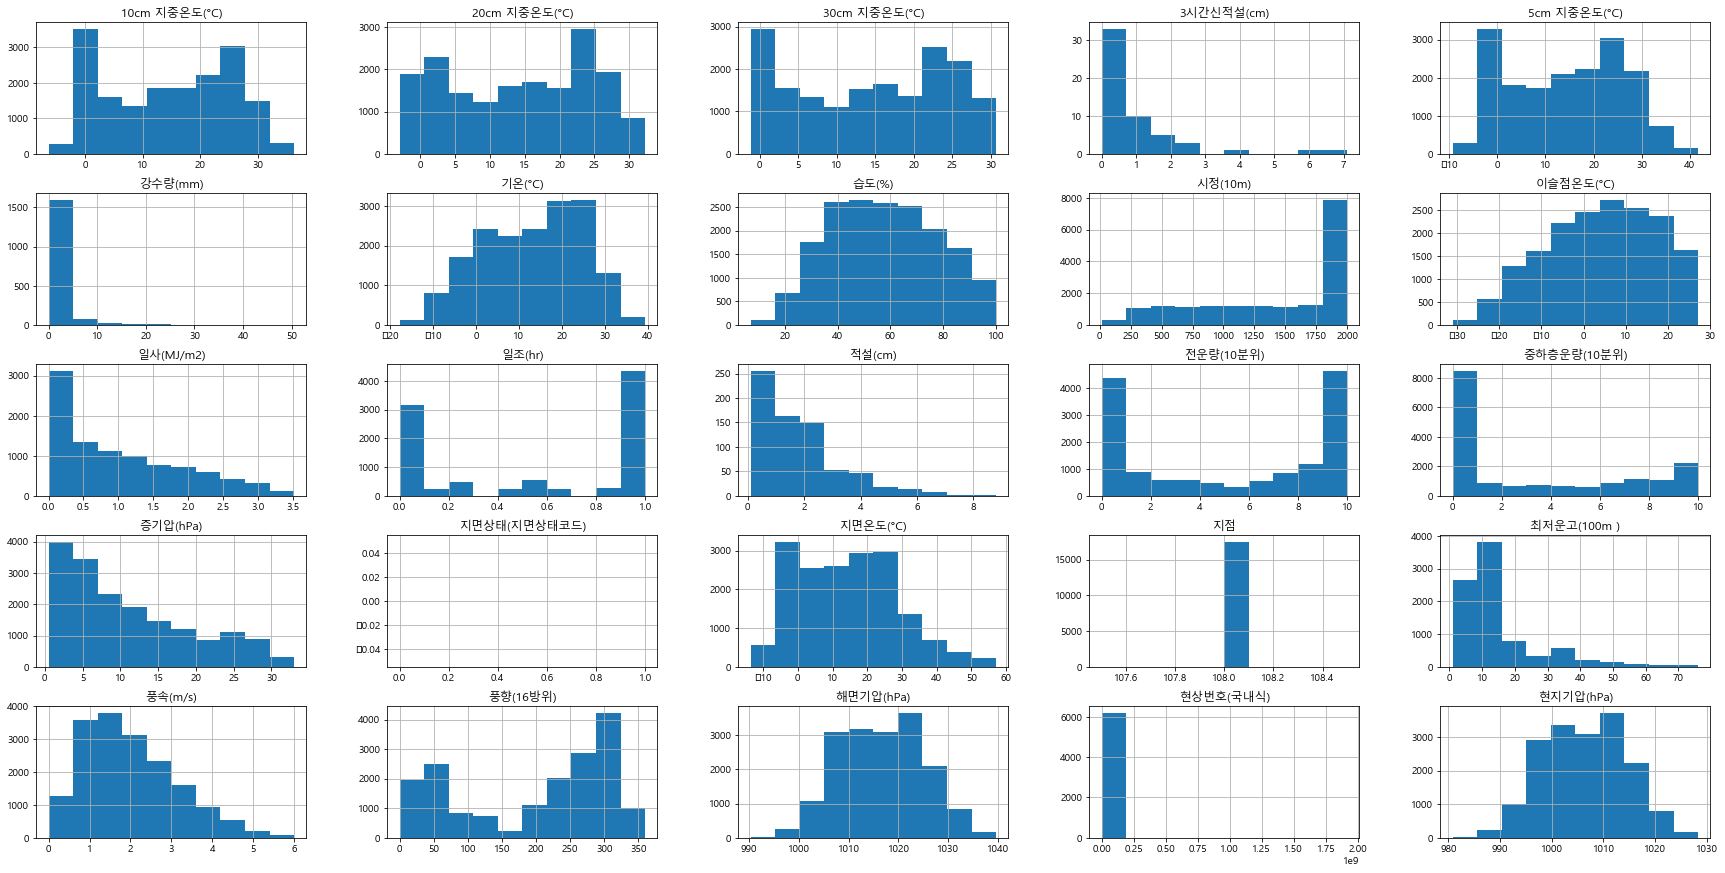

In [61]:
df_raw_air.hist(figsize=(30,15))

In [ ]:
df_raw